# 🐷 Susie Package Test Notebook

### 🔷 Import the necessary python libraries and Susie objects.

Importing the package from Test PyPi

In [1]:
import numpy as np
import pandas as pd
from susie.timing_data import TimingData
from susie.ephemeris import Ephemeris
import matplotlib.pyplot as plt

### 🔷 **STEP 1:** Add your transit data to the TransitTimes object.

❗️**IMPORTANT:** Use either code block below depending on your data needs. The first code block contains values pulled from a CSV file. The second has hard coded values.

<small>NOTE: You can use any method and/or file type to upload your data. Just make sure the resulting variables (epoch, mid transit times, and mid transit time errors) are numpy arrays</small>

Can use this code block if you have the **CSV file**

In [2]:
url = 'https://raw.githubusercontent.com/BoiseStatePlanetary/susie/refs/heads/main/example_data/wasp12b_tra_occ.csv'

# Read the CSV file directly from the URL
data = pd.read_csv(url)
tra_or_occs = np.array(data["tra_or_occ"])
epochs = np.array(data["epoch"].astype('int'))
mid_times = np.array(data["mid_time"])
mid_time_errs = np.array(data["mid_time_err"])

In [3]:
# Create new transit times object with above data
timing_obj1 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, tra_or_occ=tra_or_occs, time_scale='tdb')

In [4]:
ephemeris_obj1 = Ephemeris(timing_obj1)

In [5]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.fit_model('linear')

/opt/anaconda3/lib/python3.12/site-packages/susie/ephemeris.py:100: RuntimeWarning: divide by zero encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan


In [6]:
# for key, value in linear_model_data.items():
#     print(f"{key}: {value}\n")

print(type(linear_model_data['model_data']))

<class 'numpy.ndarray'>


In [7]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
quadratic_model_data = ephemeris_obj1.fit_model('quadratic')

/opt/anaconda3/lib/python3.12/site-packages/susie/ephemeris.py:234: RuntimeWarning: divide by zero encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan


In [8]:
for key, value in quadratic_model_data.items():
    print(f"{key}: {value}\n")

period: 1.0914201004265118

period_err: 4.3900535211519775e-08

conjunction_time: 2456305.455807562

conjunction_time_err: 3.414167652367265e-05

period_change_by_epoch: -9.901370056956608e-10

period_change_by_epoch_err: 7.206673412049207e-11

model_type: quadratic

model_data: [2454515.52551133 2454769.28103476 2454773.64672073 2454836.40345546
 2454840.76914119 2455140.90999678 2455147.4585237  2455163.82984085
 2455172.56120991 2455194.93534233 2455202.57529006 2455209.6695277
 2455210.76094879 2455230.40652831 2455254.41779174 2455494.53039964
 2455498.89608298 2455509.81029125 2455510.90171207 2455517.99594703
 2455518.5416578  2455542.55291547 2455542.55291547 2455566.56417267
 2455576.93266962 2455587.84687718 2455590.57542939 2455598.2153746
 2455600.39821609 2455601.48963683 2455603.6724783  2455623.31805141
 2455876.52763163 2455887.44183648 2455888.53325696 2455890.71609791
 2455903.81314356 2455910.90737638 2455920.18445042 2455923.45871177
 2455924.00442182 2455946.378540

In [9]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
precession_model_data = ephemeris_obj1.fit_model('precession')
for key, value in precession_model_data.items():
    print(f"{key}: {value}\n")

period: 1.0914196985313172

period_err: 1.3218760080415902e-07

conjunction_time: 2456305.45536

conjunction_time_err: 0.0001570640613445608

eccentricity: 0.0010000000000000009

eccentricity_err: 0.0005602519531796543

pericenter: 2.0

pericenter_err: 0.4577749036402396

pericenter_change_by_epoch: 0.001

pericenter_change_by_epoch_err: 0.00035384927720100097

model_type: precession

model_data: [2454515.52672922 2454769.28250952 2454773.64818754 2454836.40417001
 2454840.76984965 2455140.91033478 2455147.45885465 2455163.83015435
 2455172.56151422 2455194.93609658 2455202.57603244 2455209.66979377
 2455210.76121376 2455230.40677362 2455254.41801352 2455494.53041674
 2455498.89609686 2455509.81029716 2455510.90171719 2455517.99623467
 2455518.5416574  2455542.55289812 2455542.55289812 2455566.56413887
 2455576.93288028 2455587.84707389 2455590.57537967 2455598.21531993
 2455600.39816001 2455601.48958005 2455603.67242012 2455623.31798082
 2455876.52743105 2455887.44163151 2455888.53305

/opt/anaconda3/lib/python3.12/site-packages/susie/ephemeris.py:369: RuntimeWarning: divide by zero encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan


In [10]:
help(ephemeris_obj1.fit_model)

Help on method fit_model in module susie.ephemeris:

fit_model(model_type) method of susie.ephemeris.Ephemeris instance
    Fits the timing data to a specified model using an LMfit Model fit.

    Parameters
    ----------
        model_type: str
            Either 'linear', 'quadratic', or 'precession'. Represents the type of model to fit the data to.

    Returns
    -------
        model_data: dict
            A dictionary of best-fit parameters from the model fit.
                Example:

                If a linear model is chosen, these parameters are:

                .. code-block:: python

                    {
                        'model_type': "Either linear, quadratic, or precession",
                        'model_data': "A list of calculated mid-times using the best-fit parameter values for each epoch",
                        'period': "Estimated orbital period of the exoplanet (in units of days)",
                        'period_err': "Uncertainty associated with or

In [12]:
linear_bic_value = ephemeris_obj1.calc_bic(linear_model_data)
quadratic_bic_value = ephemeris_obj1.calc_bic(quadratic_model_data)
precession_bic_value = ephemeris_obj1.calc_bic(precession_model_data)

print(f"Linear Model BIC: {linear_bic_value}\nQuadratic Model BIC: {quadratic_bic_value}\nPrecession Model BIC: {precession_bic_value}")

Linear Model BIC: 386.71897985393696
Quadratic Model BIC: 184.99006009832587
Precession Model BIC: 398.67927230204737


In [14]:
lq_delta_bic_value = ephemeris_obj1.calc_delta_bic("linear", "quadratic")
lp_delta_bic_value = ephemeris_obj1.calc_delta_bic("linear", "precession")
qp_delta_bic_value = ephemeris_obj1.calc_delta_bic("quadratic", "precession")

print(f"Linear vs. Quadratic \u0394 BIC: {lq_delta_bic_value}\nLinear vs. Precession \u0394 BIC: {lp_delta_bic_value}\nQuadratic vs. Precession \u0394 BIC: {qp_delta_bic_value}")

Linear vs. Quadratic Δ BIC: 201.7289197556111
Linear vs. Precession Δ BIC: -11.960292448110408
Quadratic vs. Precession Δ BIC: -213.6892122037215


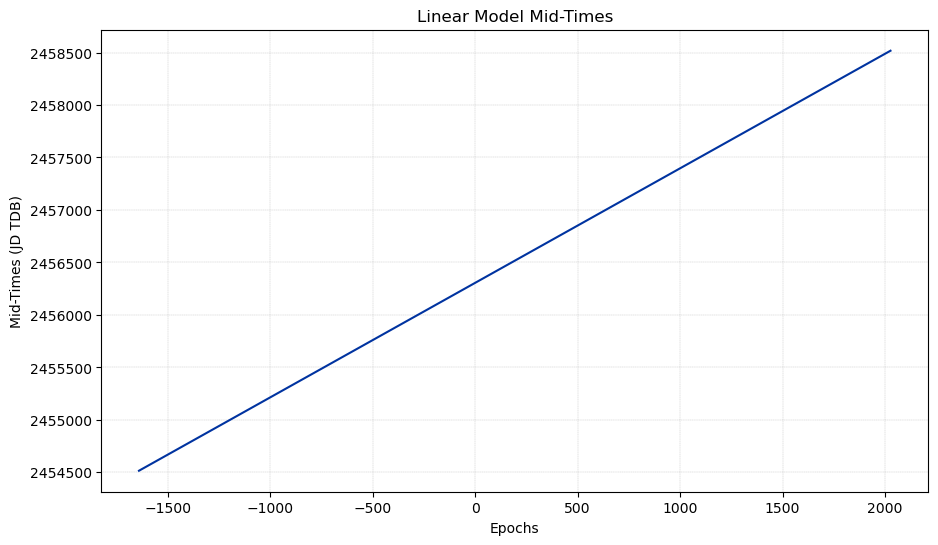

In [16]:
ephemeris_obj1.plot_model(linear_model_data, save_plot=False)
plt.show()

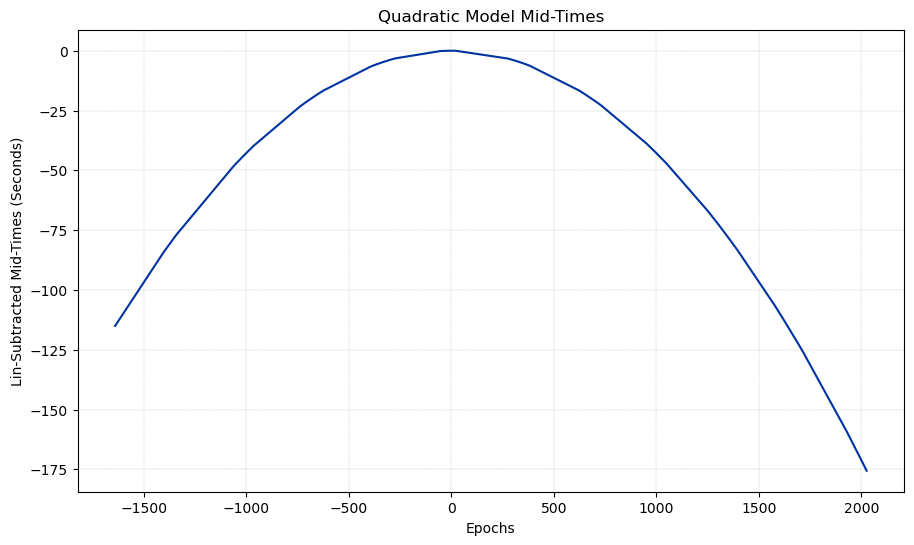

In [17]:
ephemeris_obj1.plot_model(quadratic_model_data, subtract_lin_params=True)
plt.show()

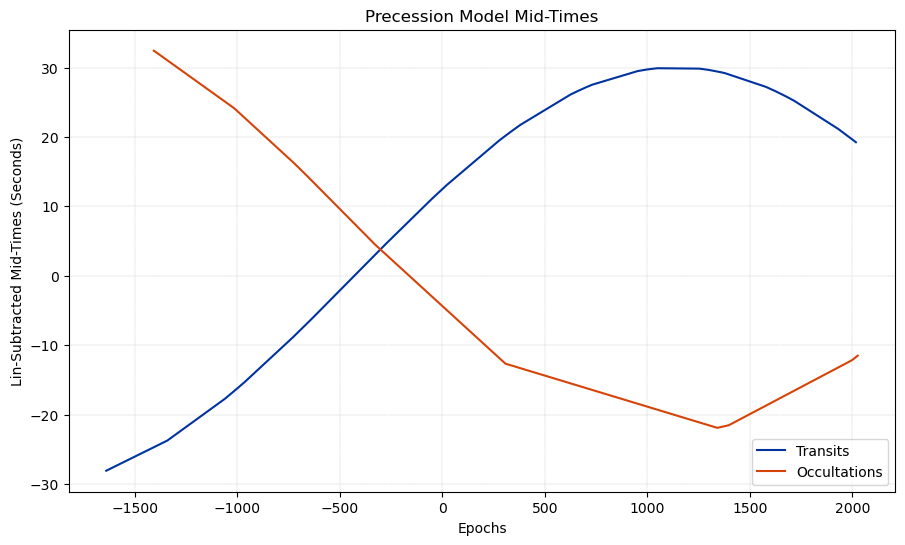

In [18]:
ephemeris_obj1.plot_model(precession_model_data, subtract_lin_params=True, show_occultations=True)
plt.show()

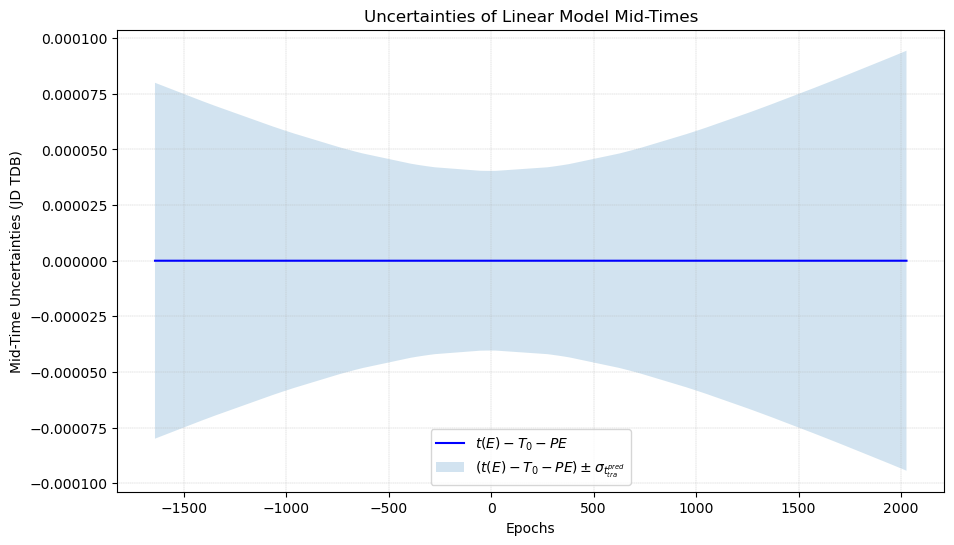

In [20]:
ephemeris_obj1.plot_timing_uncertainties(linear_model_data, save_plot=False)
plt.show()

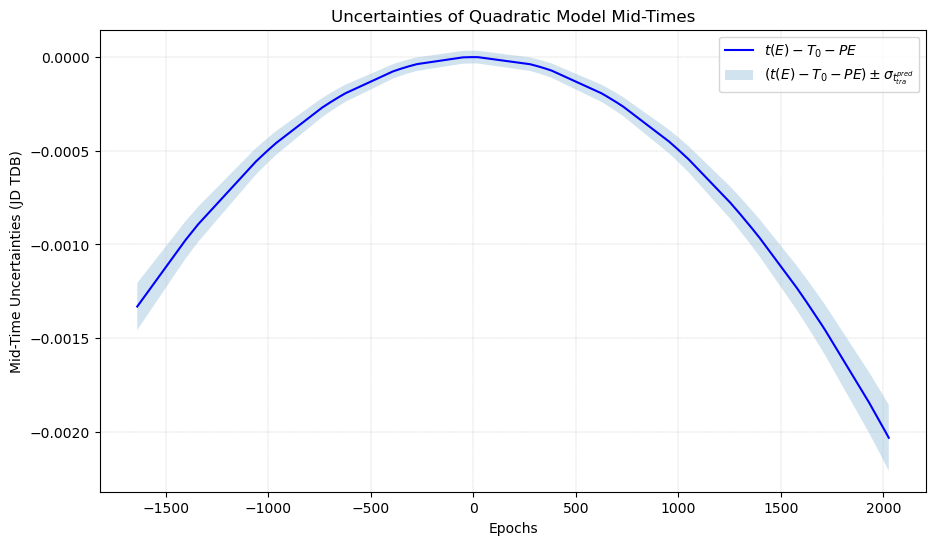

In [21]:
ephemeris_obj1.plot_timing_uncertainties(quadratic_model_data, save_plot=False)
plt.show()

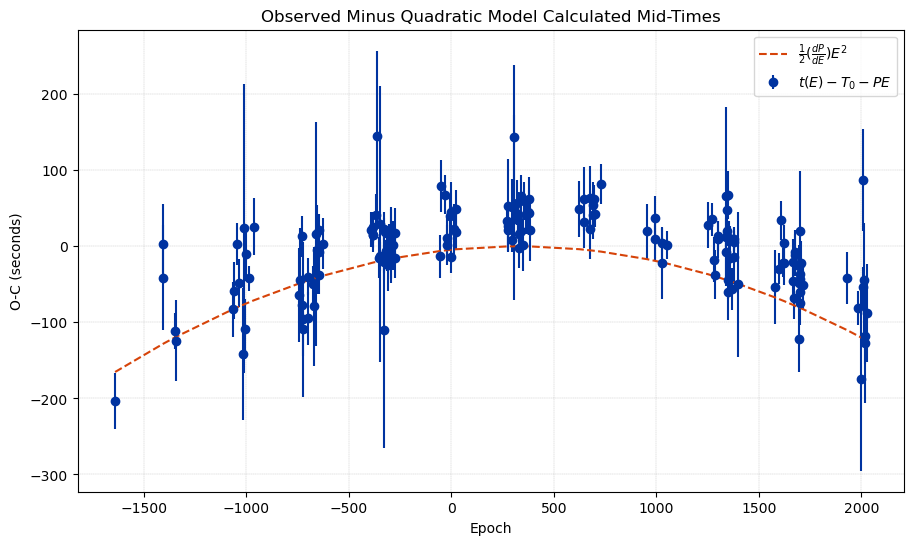

In [22]:
ephemeris_obj1.plot_oc_plot("quadratic")
plt.show()

<Axes: title={'center': 'Value of $\\Delta$BIC Comparing Linear and Precession Models\nas Observational Epochs Increase'}, xlabel='Epoch', ylabel='$\\Delta$BIC'>

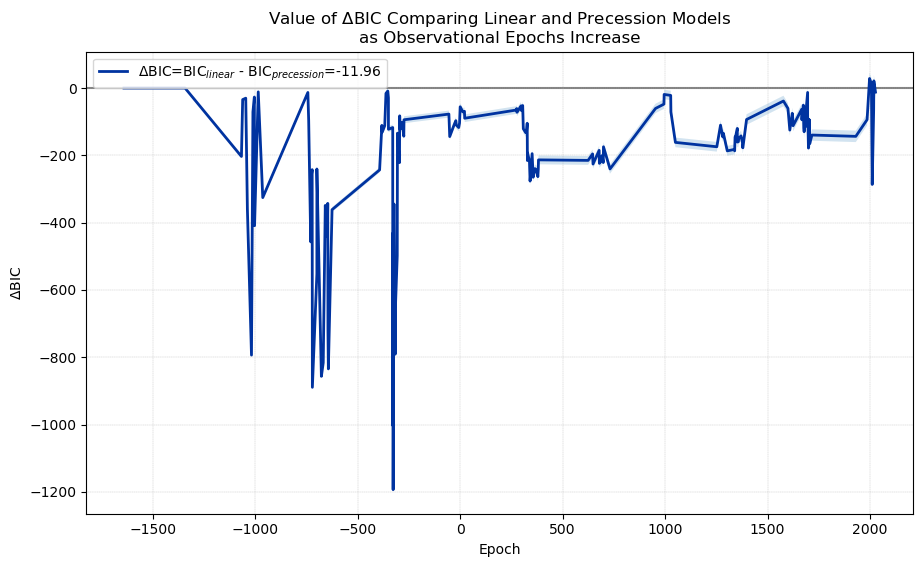

In [23]:
ephemeris_obj1.plot_running_delta_bic("linear", "precession")

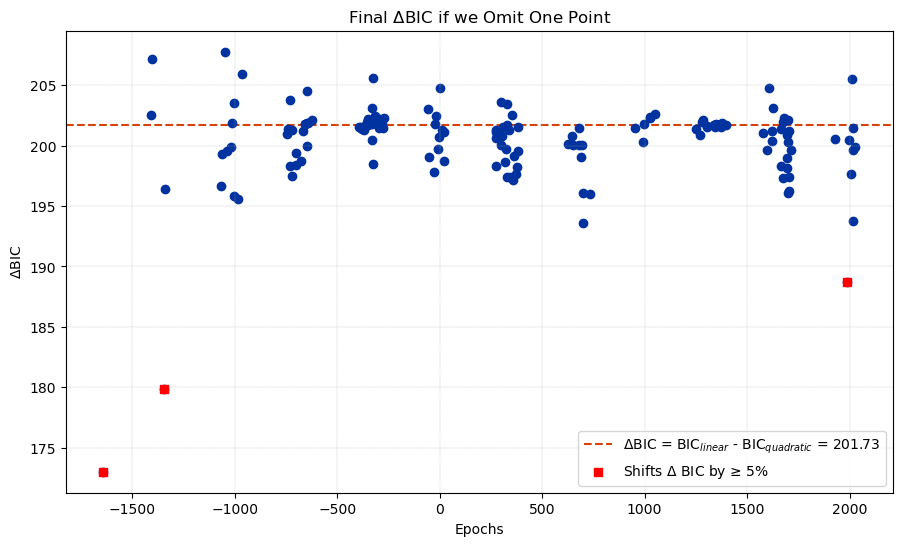

In [24]:
ephemeris_obj1.plot_delta_bic_omit_one("linear", "quadratic", outlier_percentage=5)
plt.show()

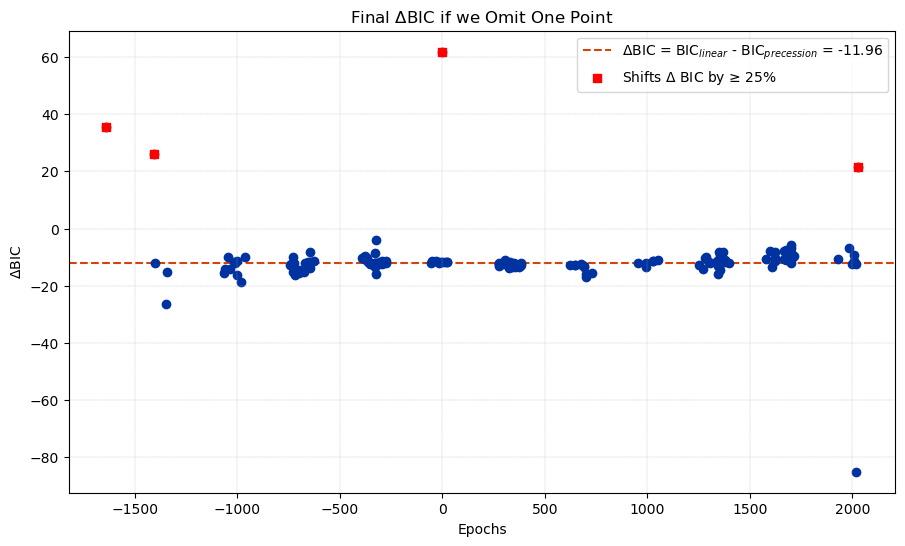

In [25]:
ephemeris_obj1.plot_delta_bic_omit_one("linear", "precession", outlier_percentage=25)
plt.show()

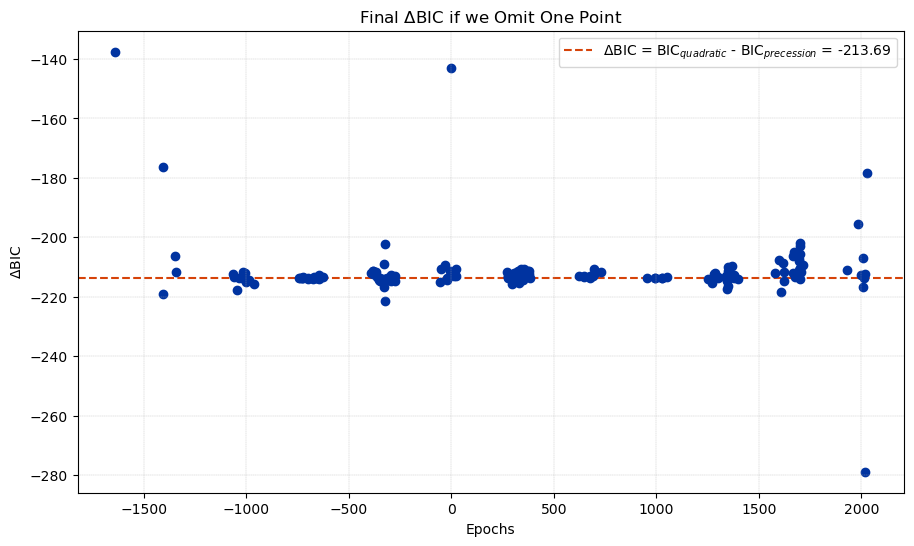

In [26]:
ephemeris_obj1.plot_delta_bic_omit_one("quadratic", "precession")
plt.show()